# Association Rule Mining 

Install "mlxtend" and "networkx"

In [147]:
# !pip3 install mlxtend

In [148]:
#!pip install networkx

Import required packages

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

Importing groceries file from folder

In [150]:
data = pd.read_csv('groceries.csv')
df = data.copy()
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [151]:
df.shape

(700, 1)

Making sure all items in lower case

In [152]:
df['Items'] = df['Items'].str.lower()

In [153]:
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


### Converting into List

<img src="grocery.jpg" width=65%>


In [154]:
#CONVERTING TO ARRAY FOR DOING ONE - HOT ENCODING
items = df['Items'].str.split(',').values 
type(items)

numpy.ndarray

In [155]:
items.shape

(700,)

In [156]:
items.tolist()

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [157]:
items = items.tolist()
type(items)

list

### Applying One Hot Transaction for Apriori Algorithm

What is One Hot Encoding or Transaction?

<img src="https://i.imgur.com/mtimFxh.png" width=500, height=400>

In [158]:
# For One-Hot encoding
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit_transform(items)
oht_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False]])

In [159]:
oht.columns_

['abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cookware',
 'cream cheese ',
 'curd',
 'curd cheese',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen meals',
 'frozen potato products',
 'frozen vegetables',
 'fruit/vegetable juice',
 'grapes',
 'hair spray',
 'ham',
 'hamburger 

In [160]:
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,...,turkey,uht-milk,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [161]:
df.shape

(700, 152)

In [162]:
oht = TransactionEncoder()
type(oht)

mlxtend.preprocessing.transactionencoder.TransactionEncoder

### Applying Apriori algorithm

Applying Apriopri algorithm with minimum support 1%

In [170]:
# For Apriori Algorithm
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

      support                                       itemsets
0    0.011429                                (baking powder)
1    0.060000                                         (beef)
2    0.040000                                      (berries)
3    0.031429                                    (beverages)
4    0.064286                                 (bottled beer)
..        ...                                            ...
309  0.012857  (tropical fruit, whole milk, root vegetables)
310  0.010000          (yogurt, whole milk, root vegetables)
311  0.011429                  (yogurt, whole milk, sausage)
312  0.011429                     (soda, yogurt, whole milk)
313  0.012857           (yogurt, whole milk, tropical fruit)

[314 rows x 2 columns]


Making rules using at least 50% confidence

In [171]:
# For Association Rules
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cereals),(whole milk),0.011429,0.251429,0.010000,0.875000,3.480114,0.007127,5.988571
1,(frankfurter),(rolls/buns),0.068571,0.218571,0.034286,0.500000,2.287582,0.019298,1.562857
2,(frozen dessert),(whole milk),0.014286,0.251429,0.011429,0.800000,3.181818,0.007837,3.742857
3,(ham),(whole milk),0.022857,0.251429,0.014286,0.625000,2.485795,0.008539,1.996190
4,(margarine),(whole milk),0.051429,0.251429,0.025714,0.500000,1.988636,0.012784,1.497143
5,(pip fruit),(whole milk),0.045714,0.251429,0.022857,0.500000,1.988636,0.011363,1.497143
6,(sliced cheese),(rolls/buns),0.024286,0.218571,0.014286,0.588235,2.691273,0.008978,1.897755
7,(waffles),(whole milk),0.025714,0.251429,0.012857,0.500000,1.988636,0.006392,1.497143
8,"(yogurt, curd)",(whole milk),0.024286,0.251429,0.014286,0.588235,2.339572,0.008180,1.817959
9,"(whole milk, frankfurter)",(rolls/buns),0.021429,0.218571,0.011429,0.533333,2.440087,0.006745,1.674490


Checking comparison of Support, Confidence and Lift

In [172]:
support=rules.support.values
confidence=rules.confidence.values
lift=rules.lift.values

In [1]:
# support=rules.as_matrix(columns=['support'])
# confidence=rules.as_matrix(columns=['confidence'])
# lift=rules.as_matrix(columns=['lift'])

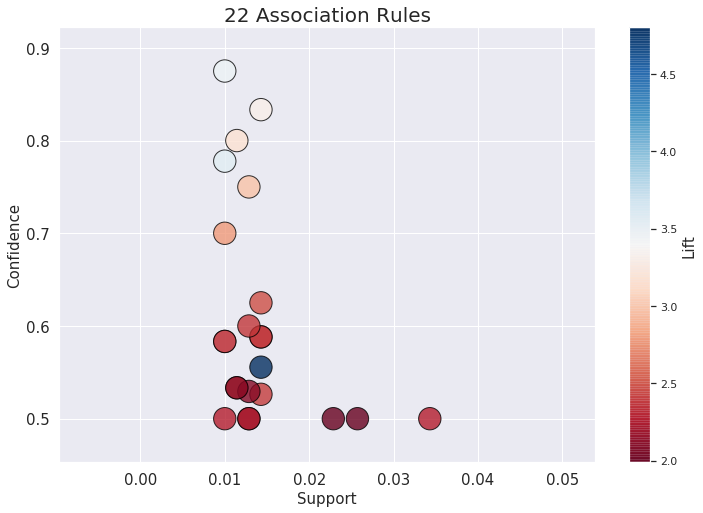

In [174]:
import apriori_helper as ap
ap.draw_plot(support,confidence,lift)

### Network Graph

A network graph consists of "Node" for each event and "Edge" which defines relation which can be undirected, directed or wighted

<img src="network.png" width=45%><img src="social.png" width=45%>

**Network Graph Types**

<img src="https://www.ebi.ac.uk/training/online/sites/ebi.ac.uk.training.online/files/resize/Fig_edge_types-700x251.png">

<img src="network2.png" width=60%>

The function of plotting directed network graph for Association rules visualization is made in the helper file

Plotting network graph

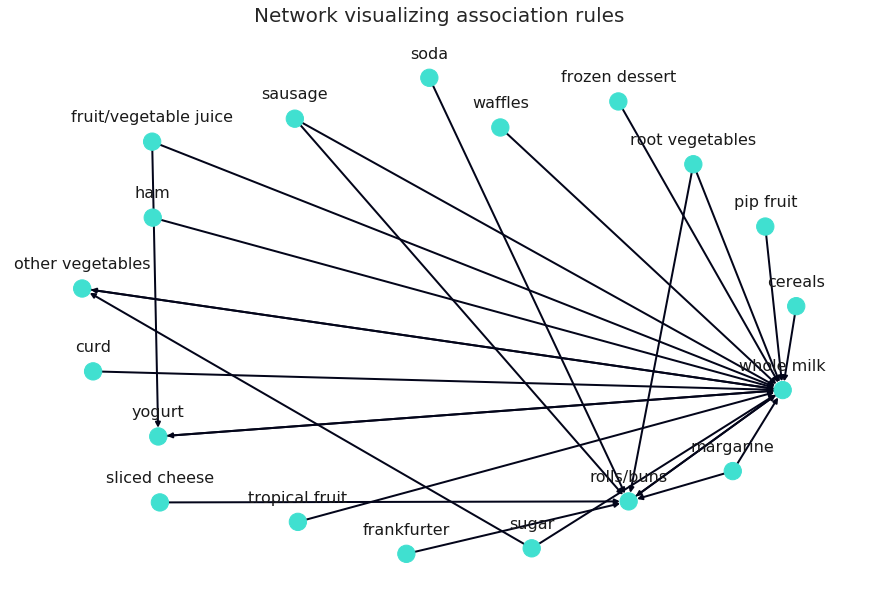

In [176]:
import apriori_helper as ap
ap.draw_graph(rules, 23)